<a href="https://colab.research.google.com/github/JosepBarbera/Xarxes/blob/main/chapter3__prelab1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Apache Spark's Structured APIs



## Prepare environment
First, we are going to prepare the environment for running PySaprk in the Google Collab Machine (if you work directly in your computer, and you want to prepare it, read and follow champter 2 instructions)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!python /content/drive/MyDrive/install_pyspark.py

Install JAVA 8
  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=b8c5f627a2e1d9d3a85f82c99644e31e08eafffc5b2a2757b8456034279bd918
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
Obtaining last version of spark
/content/drive/MyDrive/install_pyspark.py:17: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 17 of the file /content/drive/MyDrive/install_pyspark.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  soup = BeautifulSoup(html_doc)
Getting version spark-3.5.1
Installing PySpark
 

## Start working with Spark
Now we now and understand how Spark appeared in our lives and more or less how it works (and you know, it's amazing 🤭), we can start to work with it.
As you now, the SparkSession is the way programmers "talk" with Spark. So, we need to inicialize that.

In [3]:
from pyspark.sql import SparkSession

spark = (SparkSession
 .builder
 .appName("example")
 .getOrCreate())

## Example of working with RDDs
But remember, since Spark 2.X we have Structured Data APIs and WE 🧡 DF

In [4]:
from pyspark import SparkContext
# Create an RDD of tuples (name, age)
dataRDD = spark.sparkContext.parallelize([("Brooke", 20), ("Denny", 31), ("Jules", 30), ("TD", 35), ("Brooke", 25) ,("Denny", 41), ("Brooke", 45)])
# Use map and reduceByKey transformations with their lambda
# expressions to aggregate and then compute average
agesRDD = (dataRDD
.map(lambda x: (x[0], (x[1], 1)))
.reduceByKey(lambda x, y: (x[0] + y[0], x[1] + y[1]))
.map(lambda x: (x[0], x[1][0]/x[1][1])))
agesRDD.collect()

[('Brooke', 30.0), ('Denny', 36.0), ('Jules', 30.0), ('TD', 35.0)]

## Example of working with DFs
Yep, as you can see it's easier, clearlier, more bueatiful... (it looks like pandas, isn't it?)

In [5]:
from pyspark.sql.functions import avg

data_df = spark.createDataFrame([("Brooke", 20), ("Denny", 31), ("Jules", 30), ("TD", 35), ("Brooke", 25)], ["name", "age"])
# Group the same names together, aggregate their ages, and compute an average
avg_df = data_df.groupBy("name").agg(avg("age"))
# Show the results of the final execution
avg_df.show()

+------+--------+
|  name|avg(age)|
+------+--------+
|Brooke|    22.5|
| Denny|    31.0|
| Jules|    30.0|
|    TD|    35.0|
+------+--------+



## Define schemas
There are two ways to defines them:

### Define the schema programatically

In [6]:
from pyspark.sql.types import *
schema_programatically = StructType([StructField("Id", IntegerType(), False),
  StructField("First", StringType(), False),
  StructField("Last", StringType(), False),
  StructField("Url", StringType(), False),
  StructField("Published", StringType(), False),
  StructField("Hints", IntegerType(), False),
  StructField("Campaigns", ArrayType(StringType()), False),
 ])

### Define the schema using DDL

In [7]:
schema_ddl = "`Id` INT, `First` STRING, `Last` STRING, `Url` STRING, `Published` STRING, `Hits` INT, `Campaigns` ARRAY<STRING>"

### Example creating data with both

In [8]:
#create our data
data = [[1, "Jules", "Damji", "https://tinyurl.1", "1/4/2016", 4535, ["twitter", "LinkedIn"]],
       [2, "Brooke","Wenig","https://tinyurl.2", "5/5/2018", 8908, ["twitter", "LinkedIn"]],
       [3, "Denny", "Lee", "https://tinyurl.3","6/7/2019",7659, ["web", "twitter", "FB", "LinkedIn"]],
       [4, "Tathagata", "Das","https://tinyurl.4", "5/12/2018", 10568, ["twitter", "FB"]],
       [5, "Matei","Zaharia", "https://tinyurl.5", "5/14/2014", 40578, ["web", "twitter", "FB", "LinkedIn"]],
       [6, "Reynold", "Xin", "https://tinyurl.6", "3/2/2015", 25568, ["twitter", "LinkedIn"]]
      ]

In [9]:
# create a DataFrame using the schema built programatically
blogs_df = spark.createDataFrame(data, schema_programatically)
blogs_df.show()

+---+---------+-------+-----------------+---------+-----+--------------------+
| Id|    First|   Last|              Url|Published|Hints|           Campaigns|
+---+---------+-------+-----------------+---------+-----+--------------------+
|  1|    Jules|  Damji|https://tinyurl.1| 1/4/2016| 4535| [twitter, LinkedIn]|
|  2|   Brooke|  Wenig|https://tinyurl.2| 5/5/2018| 8908| [twitter, LinkedIn]|
|  3|    Denny|    Lee|https://tinyurl.3| 6/7/2019| 7659|[web, twitter, FB...|
|  4|Tathagata|    Das|https://tinyurl.4|5/12/2018|10568|       [twitter, FB]|
|  5|    Matei|Zaharia|https://tinyurl.5|5/14/2014|40578|[web, twitter, FB...|
|  6|  Reynold|    Xin|https://tinyurl.6| 3/2/2015|25568| [twitter, LinkedIn]|
+---+---------+-------+-----------------+---------+-----+--------------------+



In [10]:
# create a DataFrame using the schema built using DDL
blogs_df = spark.createDataFrame(data, schema_ddl)
blogs_df.show(truncate=False)

+---+---------+-------+-----------------+---------+-----+----------------------------+
|Id |First    |Last   |Url              |Published|Hits |Campaigns                   |
+---+---------+-------+-----------------+---------+-----+----------------------------+
|1  |Jules    |Damji  |https://tinyurl.1|1/4/2016 |4535 |[twitter, LinkedIn]         |
|2  |Brooke   |Wenig  |https://tinyurl.2|5/5/2018 |8908 |[twitter, LinkedIn]         |
|3  |Denny    |Lee    |https://tinyurl.3|6/7/2019 |7659 |[web, twitter, FB, LinkedIn]|
|4  |Tathagata|Das    |https://tinyurl.4|5/12/2018|10568|[twitter, FB]               |
|5  |Matei    |Zaharia|https://tinyurl.5|5/14/2014|40578|[web, twitter, FB, LinkedIn]|
|6  |Reynold  |Xin    |https://tinyurl.6|3/2/2015 |25568|[twitter, LinkedIn]         |
+---+---------+-------+-----------------+---------+-----+----------------------------+



## Exercice 1
As you can see, the previous schema are not exactly the same. In the programatically way, we can specify not nulleable values. Any idea about how to do the same with DDL?

In [11]:
schema_ddl_nulleable = "`Id` INT NOT NULL, `First` STRING NOT NULL, `Last` STRING NOT NULL, `Url` STRING NOT NULL, `Published` STRING NOT NULL, `Hits` INT NOT NULL, `Campaigns` ARRAY<String>"

In [12]:
# Create a DataFrame using the schema built with DDL
blogs_df = spark.createDataFrame(data, schema_ddl_nulleable)
blogs_df.show()

+---+---------+-------+-----------------+---------+-----+--------------------+
| Id|    First|   Last|              Url|Published| Hits|           Campaigns|
+---+---------+-------+-----------------+---------+-----+--------------------+
|  1|    Jules|  Damji|https://tinyurl.1| 1/4/2016| 4535| [twitter, LinkedIn]|
|  2|   Brooke|  Wenig|https://tinyurl.2| 5/5/2018| 8908| [twitter, LinkedIn]|
|  3|    Denny|    Lee|https://tinyurl.3| 6/7/2019| 7659|[web, twitter, FB...|
|  4|Tathagata|    Das|https://tinyurl.4|5/12/2018|10568|       [twitter, FB]|
|  5|    Matei|Zaharia|https://tinyurl.5|5/14/2014|40578|[web, twitter, FB...|
|  6|  Reynold|    Xin|https://tinyurl.6| 3/2/2015|25568| [twitter, LinkedIn]|
+---+---------+-------+-----------------+---------+-----+--------------------+



### Get Schema from DF

In [ ]:
blogs_df.schema

StructType([StructField('Id', IntegerType(), True), StructField('First', StringType(), True), StructField('Last', StringType(), True), StructField('Url', StringType(), True), StructField('Published', StringType(), True), StructField('Hits', IntegerType(), True), StructField('Campaigns', ArrayType(StringType(), True), True)])

### Read data from json
Download data from https://github.com/databricks/LearningSparkV2/blob/master/chapter3/scala/data/blogs.json

In [13]:
import wget
json_url = "https://raw.githubusercontent.com/databricks/LearningSparkV2/master/chapter3/scala/data/blogs.json"
wget.download(json_url)

'blogs.json'

In [14]:
blogs_df = spark.read.json('blogs.json')

In [15]:
blogs_df = spark.read.schema(schema_ddl).json('blogs.json')

*Return to slides*

## Columns and Expressions

### List all columns of DF

In [16]:
blogs_df.columns

['Id', 'First', 'Last', 'Url', 'Published', 'Hits', 'Campaigns']

### Access to particular columns with col function

In [17]:
blogs_df["Id"]

Column<'Id'>

### Different ways of computing values

In [18]:
from pyspark.sql.functions import expr
blogs_df.select(expr("Hits * 2")).show()

+----------+
|(Hits * 2)|
+----------+
|      9070|
|     17816|
|     15318|
|     21136|
|     81156|
|     51136|
+----------+



In [19]:
blogs_df.selectExpr("Hits * 2").show()

+----------+
|(Hits * 2)|
+----------+
|      9070|
|     17816|
|     15318|
|     21136|
|     81156|
|     51136|
+----------+



In [20]:
from pyspark.sql.functions import col
blogs_df.select(col("Hits") * 2).show()

+----------+
|(Hits * 2)|
+----------+
|      9070|
|     17816|
|     15318|
|     21136|
|     81156|
|     51136|
+----------+



### Create new columns

In [21]:
blogs_df.withColumn("Big Hitters", col("Hits")>10000).show()

+---+---------+-------+-----------------+---------+-----+--------------------+-----------+
| Id|    First|   Last|              Url|Published| Hits|           Campaigns|Big Hitters|
+---+---------+-------+-----------------+---------+-----+--------------------+-----------+
|  1|    Jules|  Damji|https://tinyurl.1| 1/4/2016| 4535| [twitter, LinkedIn]|      false|
|  2|   Brooke|  Wenig|https://tinyurl.2| 5/5/2018| 8908| [twitter, LinkedIn]|      false|
|  3|    Denny|    Lee|https://tinyurl.3| 6/7/2019| 7659|[web, twitter, FB...|      false|
|  4|Tathagata|    Das|https://tinyurl.4|5/12/2018|10568|       [twitter, FB]|       true|
|  5|    Matei|Zaharia|https://tinyurl.5|5/14/2014|40578|[web, twitter, FB...|       true|
|  6|  Reynold|    Xin|https://tinyurl.6| 3/2/2015|25568| [twitter, LinkedIn]|       true|
+---+---------+-------+-----------------+---------+-----+--------------------+-----------+



In [53]:
# big_hitters_df = blogs_df.withColumn("Big Hitters", col("Hits")>10000)

For our mental health: import pyspark.sql.functions as F

In [22]:
import pyspark.sql.functions as F
blogs_df \
  .withColumn("CompleteName", F.concat(F.col("First"), F.lit(" "), F.col("Last"))).show()

+---+---------+-------+-----------------+---------+-----+--------------------+-------------+
| Id|    First|   Last|              Url|Published| Hits|           Campaigns| CompleteName|
+---+---------+-------+-----------------+---------+-----+--------------------+-------------+
|  1|    Jules|  Damji|https://tinyurl.1| 1/4/2016| 4535| [twitter, LinkedIn]|  Jules Damji|
|  2|   Brooke|  Wenig|https://tinyurl.2| 5/5/2018| 8908| [twitter, LinkedIn]| Brooke Wenig|
|  3|    Denny|    Lee|https://tinyurl.3| 6/7/2019| 7659|[web, twitter, FB...|    Denny Lee|
|  4|Tathagata|    Das|https://tinyurl.4|5/12/2018|10568|       [twitter, FB]|Tathagata Das|
|  5|    Matei|Zaharia|https://tinyurl.5|5/14/2014|40578|[web, twitter, FB...|Matei Zaharia|
|  6|  Reynold|    Xin|https://tinyurl.6| 3/2/2015|25568| [twitter, LinkedIn]|  Reynold Xin|
+---+---------+-------+-----------------+---------+-----+--------------------+-------------+



### Select (project) some columns

In [23]:
blogs_df.select(F.col("Hits")).show()

+-----+
| Hits|
+-----+
| 4535|
| 8908|
| 7659|
|10568|
|40578|
|25568|
+-----+



In [52]:
blogs_df.select("Hits").show()

+-----+
| Hits|
+-----+
| 4535|
| 8908|
| 7659|
|10568|
|40578|
|25568|
+-----+



In [51]:
blogs_df.select(F.col("Hits"), F.col("Id")).show()

+-----+---+
| Hits| Id|
+-----+---+
| 4535|  1|
| 8908|  2|
| 7659|  3|
|10568|  4|
|40578|  5|
|25568|  6|
+-----+---+



In [24]:
blogs_df.select(["Hits", "Id"]).show()

+-----+---+
| Hits| Id|
+-----+---+
| 4535|  1|
| 8908|  2|
| 7659|  3|
|10568|  4|
|40578|  5|
|25568|  6|
+-----+---+



### Sort values

In [25]:
blogs_df.sort(col("Hits"),ascending=False).show()

+---+---------+-------+-----------------+---------+-----+--------------------+
| Id|    First|   Last|              Url|Published| Hits|           Campaigns|
+---+---------+-------+-----------------+---------+-----+--------------------+
|  5|    Matei|Zaharia|https://tinyurl.5|5/14/2014|40578|[web, twitter, FB...|
|  6|  Reynold|    Xin|https://tinyurl.6| 3/2/2015|25568| [twitter, LinkedIn]|
|  4|Tathagata|    Das|https://tinyurl.4|5/12/2018|10568|       [twitter, FB]|
|  2|   Brooke|  Wenig|https://tinyurl.2| 5/5/2018| 8908| [twitter, LinkedIn]|
|  3|    Denny|    Lee|https://tinyurl.3| 6/7/2019| 7659|[web, twitter, FB...|
|  1|    Jules|  Damji|https://tinyurl.1| 1/4/2016| 4535| [twitter, LinkedIn]|
+---+---------+-------+-----------------+---------+-----+--------------------+



*Return to slides*

## Rows

We can get all the df's records as a list of :class:`Row`

In [26]:
blogs_df.collect()

[Row(Id=1, First='Jules', Last='Damji', Url='https://tinyurl.1', Published='1/4/2016', Hits=4535, Campaigns=['twitter', 'LinkedIn']),
 Row(Id=2, First='Brooke', Last='Wenig', Url='https://tinyurl.2', Published='5/5/2018', Hits=8908, Campaigns=['twitter', 'LinkedIn']),
 Row(Id=3, First='Denny', Last='Lee', Url='https://tinyurl.3', Published='6/7/2019', Hits=7659, Campaigns=['web', 'twitter', 'FB', 'LinkedIn']),
 Row(Id=4, First='Tathagata', Last='Das', Url='https://tinyurl.4', Published='5/12/2018', Hits=10568, Campaigns=['twitter', 'FB']),
 Row(Id=5, First='Matei', Last='Zaharia', Url='https://tinyurl.5', Published='5/14/2014', Hits=40578, Campaigns=['web', 'twitter', 'FB', 'LinkedIn']),
 Row(Id=6, First='Reynold', Last='Xin', Url='https://tinyurl.6', Published='3/2/2015', Hits=25568, Campaigns=['twitter', 'LinkedIn'])]

We also can create Row objects

In [27]:
from pyspark.sql import Row

# Create a Row object
blog_row = Row(Id=6, First="Reynold", Last="Xin", Url="https://tinyurl.6", Hits=255568, Published="3/2/2015", Campaigns=["twitter"])

We can access elements in row by position:

In [28]:
blog_row[0]

6

or by column name:

In [29]:
blog_row["Id"]

6

The problem here, is that Spark doen't know the columns names... to fix we could create it like:

In [30]:
blog_named_row = Row(Id=6, First="Reynold", Last="Xin", Url="https://tinyurl.6", Hits=255568, Published="3/2/2015", Campaigns=["twitter"])

In [31]:
blog_named_row["Id"]

6

We can create a DF from a list of  Raws

In [32]:
df_from_named_raws = spark.createDataFrame([blog_named_row])

In [33]:
df_from_raws = spark.createDataFrame([blog_row], ['Id', 'First', 'Last', 'Url', 'Hits', 'Published', 'Campaigns'])

## Write results

In [34]:
parquet_path= "blogs_df.parquet"
blogs_df.write.mode("overwrite").parquet(parquet_path)
#blogs_df.write.parquet(parquet_path)

In [35]:
json_path= "blogs_df.json"
blogs_df.write.mode("overwrite").json(json_path)
#blogs_df.write.json(json_path)

Return to slides

## Filters

In [36]:
blogs_df.filter(F.col("Hits") > 10000).show()

+---+---------+-------+-----------------+---------+-----+--------------------+
| Id|    First|   Last|              Url|Published| Hits|           Campaigns|
+---+---------+-------+-----------------+---------+-----+--------------------+
|  4|Tathagata|    Das|https://tinyurl.4|5/12/2018|10568|       [twitter, FB]|
|  5|    Matei|Zaharia|https://tinyurl.5|5/14/2014|40578|[web, twitter, FB...|
|  6|  Reynold|    Xin|https://tinyurl.6| 3/2/2015|25568| [twitter, LinkedIn]|
+---+---------+-------+-----------------+---------+-----+--------------------+



In [37]:
blogs_df.where(F.col("Hits") > 10000).where(F.array_contains(F.col("Campaigns"),"FB")).show()

+---+---------+-------+-----------------+---------+-----+--------------------+
| Id|    First|   Last|              Url|Published| Hits|           Campaigns|
+---+---------+-------+-----------------+---------+-----+--------------------+
|  4|Tathagata|    Das|https://tinyurl.4|5/12/2018|10568|       [twitter, FB]|
|  5|    Matei|Zaharia|https://tinyurl.5|5/14/2014|40578|[web, twitter, FB...|
+---+---------+-------+-----------------+---------+-----+--------------------+



In [38]:
wget.download('https://github.com/databricks/LearningSparkV2/raw/master/chapter3/data/sf-fire-calls.csv')
fire_df = spark.read.csv('sf-fire-calls.csv')

wget.download('https://github.com/databricks/LearningSparkV2/raw/master/chapter3/data/sf-fire-calls.csv')
fire_df = spark.read.csv('sf-fire-calls.csv')


In [ ]:
fire_df.show()

+----------+------+--------------+----------------+----------+----------+--------------------+--------------------+--------------------+----+-------+---------+-----------+----+----------------+--------+-------------+-------+-------------+---------+--------------+--------------------+--------------------+------------------+--------------------+--------------------+-------------+---------+
|       _c0|   _c1|           _c2|             _c3|       _c4|       _c5|                 _c6|                 _c7|                 _c8| _c9|   _c10|     _c11|       _c12|_c13|            _c14|    _c15|         _c16|   _c17|         _c18|     _c19|          _c20|                _c21|                _c22|              _c23|                _c24|                _c25|         _c26|     _c27|
+----------+------+--------------+----------------+----------+----------+--------------------+--------------------+--------------------+----+-------+---------+-----------+----+----------------+--------+-------------+--

In [39]:
from pyspark.sql.types import StructType, StructField, StringType, TimestampType

schema = StructType([
    StructField("IncidentNumber", StringType(), True),
    StructField("AvailableDtTm", TimestampType(), True),
    StructField("CallType", StringType(), True)
    # Add more fields as needed based on your CSV file
])

fire_df = spark.read.csv('sf-fire-calls.csv', header=True, schema=schema)

medical_inc_df = fire_df \
    .select("IncidentNumber", "AvailableDtTm", "CallType") \
    .where(F.col("CallType") != "Medical Incident")

In [40]:
medical_inc_df.show(5, False)

+--------------+-------------------+--------+
|IncidentNumber|AvailableDtTm      |CallType|
+--------------+-------------------+--------+
|20110016      |2024-04-29 13:00:00|2003235 |
|20110022      |NULL               |2003241 |
|20110023      |NULL               |2003242 |
|20110032      |NULL               |2003250 |
|20110043      |NULL               |2003259 |
+--------------+-------------------+--------+
only showing top 5 rows



### Aggregations
Let's imagine, we want to count different kinds of calls

In [41]:
fire_df\
  .select("CallType")\
  .where(F.col("CallType").isNotNull())\
  .agg(F.count_distinct("CallType").alias("diff_types"))\
  .show()

+----------+
|diff_types|
+----------+
|    168571|
+----------+



And list them

In [42]:
fire_df\
  .select("CallType")\
  .where(F.col("CallType").isNotNull())\
  .distinct()\
  .show(30 ,truncate=False)

+--------+
|CallType|
+--------+
|2006423 |
|2006795 |
|2013793 |
|2014151 |
|2015282 |
|2016389 |
|2021702 |
|2022219 |
|2022742 |
|2023877 |
|2023933 |
|2029194 |
|2030366 |
|2032143 |
|2033208 |
|2033690 |
|2036496 |
|2042962 |
|2044524 |
|2047582 |
|2048335 |
|2050248 |
|2051275 |
|2055332 |
|2057059 |
|2067007 |
|2067476 |
|2069607 |
|2069723 |
|2070736 |
+--------+
only showing top 30 rows



 ### Renaming, adding and dropping columns

In [43]:
new_fire_df = fire_df.withColumnRenamed("Delay", "ResponseDelayedinMins")

In [44]:
new_fire_df.printSchema()

root
 |-- IncidentNumber: string (nullable = true)
 |-- AvailableDtTm: timestamp (nullable = true)
 |-- CallType: string (nullable = true)



Now, usual data processing: change dates to timestamps:

In [45]:
from pyspark.sql.functions import col, to_timestamp

fire_ts_df = (new_fire_df
    .withColumn("IncidentDate", to_timestamp(col("AvailableDtTm"), "MM/dd/yyyy hh:mm:ss a"))
    .drop("AvailableDtTm"))
fire_ts_df.printSchema()

root
 |-- IncidentNumber: string (nullable = true)
 |-- CallType: string (nullable = true)
 |-- IncidentDate: timestamp (nullable = true)



In [46]:
fire_ts_df.show()

+--------------+--------+-------------------+
|IncidentNumber|CallType|       IncidentDate|
+--------------+--------+-------------------+
|      20110016| 2003235|2024-04-29 13:00:00|
|      20110022| 2003241|               NULL|
|      20110023| 2003242|               NULL|
|      20110032| 2003250|               NULL|
|      20110043| 2003259|               NULL|
|      20110072| 2003279|2024-04-29 08:00:00|
|      20110125| 2003301|               NULL|
|      20110130| 2003304|               NULL|
|      20110197| 2003343|               NULL|
|      20110215| 2003348|               NULL|
|      20110274| 2003381|               NULL|
|      20110275| 2003382|2024-04-29 15:00:00|
|      20110304| 2003399|               NULL|
|      20110308| 2003403|               NULL|
|      20110313| 2003408|               NULL|
|      20110313| 2003408|               NULL|
|      20110313| 2003408|               NULL|
|      20110315| 2003409|               NULL|
|      20110330| 2003417|         

### Aggregations

 + What are the most common types of fire calls?

In [47]:
(fire_ts_df
 .select("CallType")
 .where(col("CallType").isNotNull())
 .groupBy("CallType")
 .count() # it's a kind of aggregation
 .orderBy("count", ascending=False)
 .show(n=10, truncate=False))

+--------+-----+
|CallType|count|
+--------+-----+
|15010877|7    |
|6077383 |5    |
|15011972|5    |
|1035424 |5    |
|1022600 |5    |
|8090574 |4    |
|15068639|4    |
|12081781|4    |
|3046001 |4    |
|15017455|4    |
+--------+-----+
only showing top 10 rows



In [48]:
fire_ts_df.printSchema()

root
 |-- IncidentNumber: string (nullable = true)
 |-- CallType: string (nullable = true)
 |-- IncidentDate: timestamp (nullable = true)



In [49]:
fire_ts_df.show()

+--------------+--------+-------------------+
|IncidentNumber|CallType|       IncidentDate|
+--------------+--------+-------------------+
|      20110016| 2003235|2024-04-29 13:00:00|
|      20110022| 2003241|               NULL|
|      20110023| 2003242|               NULL|
|      20110032| 2003250|               NULL|
|      20110043| 2003259|               NULL|
|      20110072| 2003279|2024-04-29 08:00:00|
|      20110125| 2003301|               NULL|
|      20110130| 2003304|               NULL|
|      20110197| 2003343|               NULL|
|      20110215| 2003348|               NULL|
|      20110274| 2003381|               NULL|
|      20110275| 2003382|2024-04-29 15:00:00|
|      20110304| 2003399|               NULL|
|      20110308| 2003403|               NULL|
|      20110313| 2003408|               NULL|
|      20110313| 2003408|               NULL|
|      20110313| 2003408|               NULL|
|      20110315| 2003409|               NULL|
|      20110330| 2003417|         

In [59]:
fire_ts_df.printSchema()

root
 |-- IncidentNumber: string (nullable = true)
 |-- CallType: string (nullable = true)
 |-- IncidentDate: timestamp (nullable = true)



In [153]:
from pyspark.sql import functions as F

(fire_df
 .select(F.sum("NumAlarms"),
         F.avg("Delay"),
         F.min("Delay"),
         F.max("Delay"))
 .show())

+--------------+------------------+-----------+----------+
|sum(NumAlarms)|        avg(Delay)| min(Delay)|max(Delay)|
+--------------+------------------+-----------+----------+
|      176170.0|3.8923641541750342|0.016666668|      99.9|
+--------------+------------------+-----------+----------+



+ What were all the different types of fire calls in 2018?
+ What months within the year 2018 saw the highest number of fire calls?
+ Which neighborhood in San Francisco generated the most fire calls in 2018?
+ Which neighborhoods had the worst response times to fire calls in 2018?
+ Which week in the year in 2018 had the most fire calls?
+ Is there a correlation between neighborhood, zip code, and number of fire calls?
+ How can we use Parquet files or SQL tables to store this data and read it back?


**Using the data from San Francisco Fire Department, answer these questions:**

 What were all the different types of fire calls in 2018?

In [95]:
from pyspark.sql.functions import year, col

fire_df = spark.read.csv('sf-fire-calls.csv', header=True)
# fire_df.show()

from pyspark.sql.functions import to_timestamp
fire_ts_df = fire_df.withColumn("IncidentDate", to_timestamp(col("CallDate"), "MM/dd/yyyy"))

fire_2018_df = fire_ts_df.filter(year(col("IncidentDate")) == 2018)

call_type_counts_2018 = fire_2018_df \
    .groupBy("CallType") \
    .count() \
    .orderBy("count", ascending=False)

call_type_counts_2018 = call_type_counts_2018.select("CallType", "count")

call_type_counts_2018.show(truncate=False)

+-------------------------------+-----+
|CallType                       |count|
+-------------------------------+-----+
|Medical Incident               |7004 |
|Alarms                         |1144 |
|Structure Fire                 |906  |
|Traffic Collision              |433  |
|Outside Fire                   |153  |
|Other                          |114  |
|Citizen Assist / Service Call  |113  |
|Gas Leak (Natural and LP Gases)|69   |
|Water Rescue                   |43   |
|Elevator / Escalator Rescue    |36   |
|Electrical Hazard              |30   |
|Vehicle Fire                   |28   |
|Smoke Investigation (Outside)  |28   |
|Odor (Strange / Unknown)       |10   |
|Fuel Spill                     |10   |
|HazMat                         |5    |
|Train / Rail Incident          |5    |
|Suspicious Package             |3    |
|Assist Police                  |1    |
|Explosion                      |1    |
+-------------------------------+-----+



What months within the year 2018 saw the highest number of fire calls?

In [96]:
from pyspark.sql.functions import year, month, col

fire_2018_df = fire_ts_df.filter(year(col("IncidentDate")) == 2018)
fire_2018_df_with_month = fire_2018_df.withColumn("Month", month(col("IncidentDate")))

monthly_fire_calls_2018 = fire_2018_df_with_month \
    .groupBy("Month") \
    .count() \
    .orderBy("count", ascending=False)

monthly_fire_calls_2018.show(1 , truncate=False)

+-----+-----+
|Month|count|
+-----+-----+
|10   |1068 |
+-----+-----+
only showing top 1 row



All months within the year 2018 that saw the number of fire calls

In [97]:
from os import truncate
monthly_fire_calls_2018.show(truncate=False)

+-----+-----+
|Month|count|
+-----+-----+
|10   |1068 |
|5    |1047 |
|3    |1029 |
|8    |1021 |
|1    |1007 |
|6    |974  |
|7    |974  |
|9    |951  |
|4    |947  |
|2    |919  |
|11   |199  |
+-----+-----+



Which neighborhood in San Francisco generated the most fire calls in 2018?

In [98]:
fire_2018_df = fire_ts_df.filter(year(col("IncidentDate")) == 2018)

neighborhood_fire_calls_2018 = fire_2018_df \
    .groupBy("Neighborhood") \
    .count() \
    .orderBy("count", ascending=False)

most_fire_calls_neighborhood = neighborhood_fire_calls_2018.first()

spark.createDataFrame([most_fire_calls_neighborhood]).show()

+------------+-----+
|Neighborhood|count|
+------------+-----+
|  Tenderloin| 1393|
+------------+-----+



The top **10** neighborhoods in San Francisco that generated the most fire calls in 2018

In [99]:
top_10_neighborhoods = neighborhood_fire_calls_2018.limit(10).show(truncate=False)

+------------------------------+-----+
|Neighborhood                  |count|
+------------------------------+-----+
|Tenderloin                    |1393 |
|South of Market               |1053 |
|Mission                       |913  |
|Financial District/South Beach|772  |
|Bayview Hunters Point         |522  |
|Western Addition              |352  |
|Sunset/Parkside               |346  |
|Nob Hill                      |295  |
|Hayes Valley                  |291  |
|Outer Richmond                |262  |
+------------------------------+-----+



Which neighborhoods had the worst response times to fire calls in 2018?


In [100]:
from pyspark.sql.functions import year

fire_2018_df = fire_ts_df.filter(year(col("IncidentDate")) == 2018)
neighborhood_delay_2018 = fire_2018_df \
    .select("Neighborhood", "Delay")
neighborhood_delay_2018.show(10, False)

+------------------------------+---------+
|Neighborhood                  |Delay    |
+------------------------------+---------+
|Presidio Heights              |2.8833334|
|Mission Bay                   |6.3333335|
|Chinatown                     |2.65     |
|Financial District/South Beach|3.5333333|
|Tenderloin                    |1.1      |
|Bayview Hunters Point         |4.05     |
|Inner Richmond                |2.5666666|
|Inner Sunset                  |1.4      |
|Sunset/Parkside               |2.6666667|
|South of Market               |1.7666667|
+------------------------------+---------+
only showing top 10 rows



Which week in the year in 2018 had the most fire calls?


In [67]:
from pyspark.sql.functions import year, col, weekofyear

fire_2018_df = fire_ts_df.filter(year(col("IncidentDate")) == 2018)
weekly_fire_calls_2018 = fire_2018_df \
    .groupBy(weekofyear("IncidentDate").alias("Week")) \
    .count() \
    .orderBy("count", ascending=False)

most_fire_calls_week = weekly_fire_calls_2018.first()
most_fire_calls_week_df = spark.createDataFrame([most_fire_calls_week])

print("Week in 2018 with the most fire calls is :")
most_fire_calls_week_df.show()

Week in 2018 with the most fire calls is :
+----+-----+
|Week|count|
+----+-----+
|  22|  259|
+----+-----+



The top **8** weeks with the most fire calls

In [101]:
most_fire_calls_week = weekly_fire_calls_2018.limit(8).show()

+----+-----+
|Week|count|
+----+-----+
|  22|  259|
|  40|  255|
|  43|  250|
|  25|  249|
|   1|  246|
|  44|  244|
|  13|  243|
|  32|  243|
+----+-----+



Is there a correlation between neighborhood, zip code, and number of fire calls?


Yes, there is a correlation between neighborhood, zip code, and number of fire calls.

In [154]:
neighborhood_zip_fire_calls = fire_df.groupBy("Neighborhood", "ZipCode").count()
neighborhood_zip_fire_calls.show()

+--------------------+-------+-----+
|        Neighborhood|ZipCode|count|
+--------------------+-------+-----+
|        Inner Sunset|  94131|  392|
| Castro/Upper Market|  94110|   61|
|         Mission Bay|  94103|  167|
|     Pacific Heights|  94123|  317|
|            Nob Hill|  94109| 3983|
|          Noe Valley|  94110|  167|
|Financial Distric...|  94103| 1090|
|   Lone Mountain/USF|  94118|  753|
| Castro/Upper Market|  94103|   51|
|    Golden Gate Park|  94121|   31|
|                None|   NULL|  141|
|     Treasure Island|  94130| 1100|
|    Western Addition|  94102|  910|
|    Presidio Heights|  94115|  291|
|        Potrero Hill|  94124|   16|
|           Excelsior|  94134|  405|
|          Twin Peaks|  94131|  889|
|        Inner Sunset|  94116|  162|
|Bayview Hunters P...|  94124| 9150|
|Bayview Hunters P...|  94134|  287|
+--------------------+-------+-----+
only showing top 20 rows



Explore correlations, such as visualizations

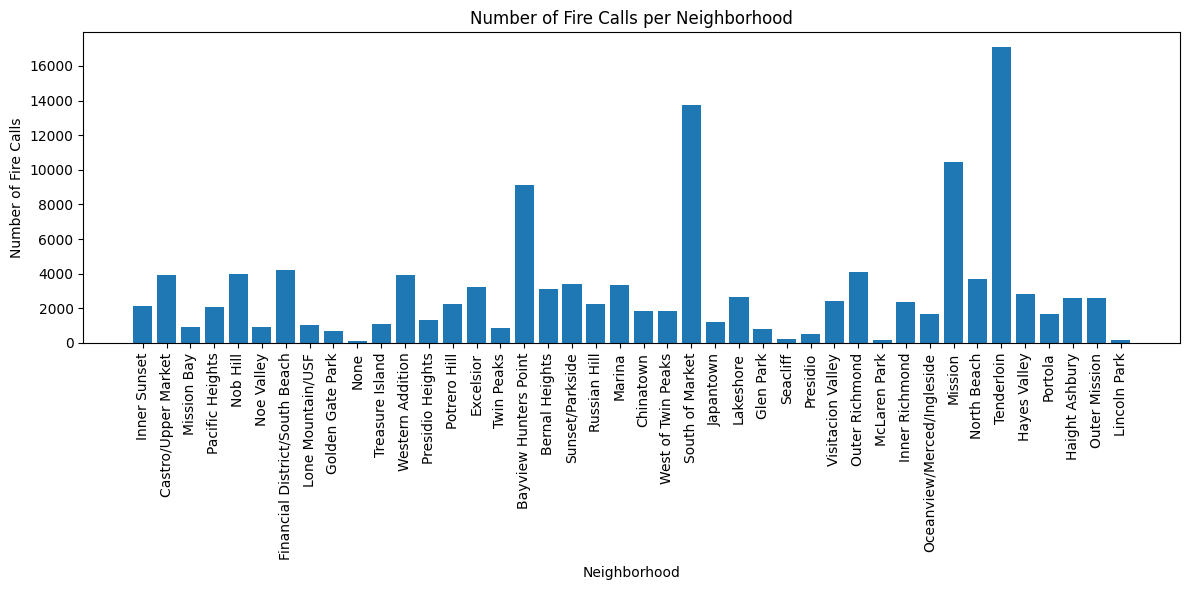

In [148]:
import matplotlib.pyplot as plt

# Convert the DataFrame to Pandas for visualization
neighborhood_zip_fire_calls_pd = neighborhood_zip_fire_calls.toPandas()

# Plot the number of fire calls per neighborhood
plt.figure(figsize=(12, 6))
plt.bar(neighborhood_zip_fire_calls_pd["Neighborhood"], neighborhood_zip_fire_calls_pd["count"])
plt.xlabel("Neighborhood")
plt.ylabel("Number of Fire Calls")
plt.title("Number of Fire Calls per Neighborhood")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

How can we use Parquet files or SQL tables to store this data and read it back?

In [149]:
try:
    fire_ts_df.write.format("parquet").mode("overwrite").save("/tmp/fireServiceParquet/")
    print("Data successfully written to Parquet files.")
except Exception as e:
    print("Error writing data to Parquet files:", str(e))


Data successfully written to Parquet files.


In [150]:
# Read Parquet files back into DataFrame
parquet_df = spark.read.parquet("/tmp/fireServiceParquet/")

In [151]:
parquet_df.show()

+----------+------+--------------+----------------+----------+----------+--------------------+--------------------+--------------------+----+-------+---------+-----------+----+----------------+--------+-------------+-------+-------------+---------+--------------+--------------------------+----------------------+------------------+--------------------+--------------------+-------------+---------+-------------------+
|CallNumber|UnitID|IncidentNumber|        CallType|  CallDate| WatchDate|CallFinalDisposition|       AvailableDtTm|             Address|City|Zipcode|Battalion|StationArea| Box|OriginalPriority|Priority|FinalPriority|ALSUnit|CallTypeGroup|NumAlarms|      UnitType|UnitSequenceInCallDispatch|FirePreventionDistrict|SupervisorDistrict|        Neighborhood|            Location|        RowID|    Delay|       IncidentDate|
+----------+------+--------------+----------------+----------+----------+--------------------+--------------------+--------------------+----+-------+---------+---

In [152]:
import os

parquet_dir = "/tmp/fireServiceParquet/"
# List files in the directory
files = os.listdir(parquet_dir)

for file in files:
    print(file)

part-00000-bb03faf7-e352-40f2-be92-0427fffb4f63-c000.snappy.parquet
._SUCCESS.crc
part-00001-bb03faf7-e352-40f2-be92-0427fffb4f63-c000.snappy.parquet
_SUCCESS
.part-00000-bb03faf7-e352-40f2-be92-0427fffb4f63-c000.snappy.parquet.crc
.part-00001-bb03faf7-e352-40f2-be92-0427fffb4f63-c000.snappy.parquet.crc
